# [Chapter 6] Preparing the nutrition data

[DSLC stages]: Data cleaning and pre-processing


## Domain problem formulation


Our goal for this project is to develop an app that can provide users with health and nutritional information about their meals.



## Data source overview


The underlying data that we will use for this project comes from the US Department of Agriculture's (USDA) *Food Data Central*. The data dictionary can be found in the  `data/data_documentation/field_descriptions_apr2020.pdf` PDF file. If you plan on working with this data, we highly recommend that you glance through this document. Fukagawa *et al*.'s article "*USDA’s FoodData Central: what is it and why is it needed today?*" (also provided in the `data/data_documentation/` folder) provides an excellent summary of the variety of sources of information contained in this database. Refer to the PCS documentation for a more thorough summary of the data source (including the other datasets provided by USDA). 

In this study, we focus on the Food and Nutrient Database for Dietary Studies  (FNDDS) food data survey, whose information was collected by the *What We Eat In America* dietary survey component of the National Health and Nutrition Examination Survey (NHANES). We originally downloaded this data in April of 2020, but the link we originally used to download the data is now broken (this is why it is helpful that we kept such meticulous notes about any websites that we download data from!). A new website for downloading the data can be found at [https://fdc.nal.usda.gov/download-datasets.html](https://fdc.nal.usda.gov/download-datasets.html) (as of late 2022).

The FNDDS data contains 8,690 food items such as a bacon and cheese sandwich, honeydew melon, and carbonara pasta. Each food item has measurements from 57 different nutrients (variables), including iron, carbohydrates, fat, thiamine, riboflavin, and many more. 


Let's start by loading in the libraries that we will use in this document.


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)



## Step 1: Review background information {#sec:bg-info}


### Information on data collection 


???Talk about how the FNDDS nutrient information was measured. 

### Data dictionary

If you have a data dictionary, print it here or provide a stable link. Discuss anything that you think it is important to point out for future you, or anyone else who might want to work with this data.


### Answering questions about the background information

In this section, we will go through the recommended background information questions from the Data Cleaning chapter.

- *What does each variable measure?* Each variable measures the amount of a particular nutrient detected in 100g of the corresponding food item.

- *How was the data collected?* ???Talk about how the measurements were collected

- *What are the observational units?* The observational units are the food items.

- *Is the data relevant to my project?* We don't quite have a sense of whether the food items included in the data are reflective of the generally available food items that we want to summarize in our app. One way we could check would be to go to the grocery store and to identify whether all of the food items are available in this dataset. Since we are just using this dataset for educational purposes, we won't do this, but if we were planning to put our eventual app into production, we would need to verify that the food items and nutrient measurements it contains are indeed relevant for a general consumer.



## Step 2: Loading the data

Since this data in its raw format is quite complex, loading a workable version of the data into our environment will involve loading and combining multiple different tables, and filtering to the relevant portion of the combined dataset.


There are three CSV files that are contained within the `data/` folder (`food_nutrient.csv`, `food.csv`, and `nutrient_name.csv`). Our first task is to combine the information spread across these files into a single object using common variables.

### `food_nutrient.csv`

`food_nutrient.csv` is the main data file, which contains the amount of each nutrient for each food item. We will load this table in as `nutrient_amount`. 

The identifier for each food item is encoded in the key variable `fdc_id` and the identifier for each nutrient variable is encoded in the key variable `nutrient_id`.


In [24]:
nutrient_amount = pd.read_csv("../data/food_nutrient.csv")
nutrient_amount.head(10)

/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_67106/1135432037.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrient_amount = pd.read_csv("../data/food_nutrient.csv")


,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,2878262,348475,1087,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
1,2878263,348475,1089,1.44,NaN,75.0,NaN,NaN,NaN,NaN,NaN
2,2878264,348475,1104,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
3,2878265,348475,1162,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
4,2878266,348475,1253,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
5,6281970,348475,1003,8.00,NaN,71.0,NaN,NaN,NaN,NaN,NaN
6,6281971,348475,1004,14.00,NaN,71.0,NaN,NaN,NaN,NaN,NaN
7,6281972,348475,1005,64.00,NaN,71.0,NaN,NaN,NaN,NaN,NaN
8,6281973,348475,1008,400.00,NaN,71.0,NaN,NaN,NaN,NaN,NaN
9,6281974,348475,2000,28.00,NaN,71.0,NaN,NaN,NaN,NaN,NaN



### `food.csv`

The names/descriptions of each food item are contained in `food.csv`, and can be joined using the food ID column, `fdc_id`. We will call this table `food_name`.

In [25]:
food_name = pd.read_csv("../data/food.csv")
food_name.head(10)

,fdc_id,data_type,description,food_category_id,publication_date
0,348475,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,NaN,2019-04-01
1,348560,branded_food,ANNIES CHWY GRAN BARS CHOC CHIP,NaN,2019-04-01
2,348783,branded_food,ANNIES HMGRWN ORG BUNNIES BATS BUNNY FRT SNCKS...,NaN,2019-04-01
3,349033,branded_food,ANNIES BKD SNCK CRCKRS CHDR SQUARES,NaN,2019-04-01
4,349046,branded_food,ANNIES BUNNY GRAHAMS SNACKS FRIENDS,NaN,2019-04-01
5,349048,branded_food,ANNIES PARTY MX TRADITIONAL,NaN,2019-04-01
6,349170,branded_food,ANNIES HMGRWN ORG COOKIE BITES CHOC CHIP,NaN,2019-04-01
7,349233,branded_food,ANNIES BUNNIES BKD SNCK CRCKRS CHDR,NaN,2019-04-01
8,349236,branded_food,ANNIES SNCK MX PIZZA,NaN,2019-04-01
9,349247,branded_food,ANNIES BUNNIES BKD SNCK CRCKRS CHDR,NaN,2019-04-01



### `nutrient_name.csv`

The names/descriptions of each nutrient are contained in `nutrient_name.csv`, and can be joined using the food ID column, `nutrient_id`. We will call this table `nutrient_name`.

In [26]:
nutrient_name = pd.read_csv("../data/nutrient_name.csv")
nutrient_name.head(10)

,nutrient_id,nutrient_name
0,1002,nitrogen
1,1003,protein
2,1004,fat
3,1005,carbohydrates
4,1007,ash
5,1008,calories
6,1009,starch
7,1010,sucrose
8,1011,glucose
9,1012,fructose



### Combining the three tables into a single dataset

Since the dataset we plan to work with will correspond to a combination of the information within these three datasets, we need to combine these three datasets. 

As mentioned above, we will use the following *ID*  variables to join the tables together:

- `fdc_id` for joining the info from the`nutrient_amount` and `food_names` tables, and 

- `nutrient_id` for joining the info from the `nutrient_amount` and `nutrient_names` tables.


However, we notice that the `nutrient_name` file does not provide a *unique* name for each `nutrient_name` value (which we will need for joining this nutrient name information to the `nutrient_amount` dataset). Below we show some examples of repeated nutrient

In [27]:
nutrient_name.query('nutrient_id in [1299, 1333]')

,nutrient_id,nutrient_name
142,1299,pentadecanoic_acid
161,1333,pentadecenoic_acid


In [28]:
nutrient_name.query('nutrient_id in [1129, 1130]')

,nutrient_id,nutrient_name
58,1129,beta_tocotrienol
59,1130,beta_tocotrienol


In [29]:
nutrient_name.query('nutrient_id in [1289, 1286]')

,nutrient_id,nutrient_name
134,1286,campesterol
137,1289,campestanol



Thus, we decided to simplify this dataset by *manually* creating a *unique* nutrient description/name for each `nutrient_id`.  An alternative approach is to write some code that chooses one of the existing non-unique names. But this is a little tricky in this particular scenario because the formatting of the nutrient names are very inconsistent and the code to choose the most consistently formatted option for each nutrient would not be straightforward. This is an example of one of the very tedious manual cleaning tasks that we sometimes need to conduct for complex and poorly formatted data.

To prepare to join the three tables together, let's create a version of each of the `nutrient_amount` and `food_name` data frames that only contain the relevant columns.

The relevant columns of `nutrient_amount` are the identifier variables `fdc_id` and `nutrient_id` and the amount of the relevant nutrient for the relevant food item, `amount`. (the other columns are almost always missing, except for `derivation_id`). 

In [30]:
nutrient_amount

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,2878262,348475,1087,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
1,2878263,348475,1089,1.44,NaN,75.0,NaN,NaN,NaN,NaN,NaN
2,2878264,348475,1104,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
3,2878265,348475,1162,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
4,2878266,348475,1253,0.00,NaN,75.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5370475,1482614,169952,1120,23.00,0.0,18.0,NaN,NaN,NaN,NaN,NaN
5370476,1482615,169952,1122,0.00,0.0,18.0,NaN,NaN,NaN,NaN,NaN
5370477,1482616,169952,1107,127.00,0.0,18.0,NaN,NaN,NaN,NaN,NaN
5370478,1482617,169952,1108,0.00,0.0,18.0,NaN,NaN,NaN,NaN,NaN


In [31]:
# create a lite version of the nutrient amount dataset, 
# containing only the relevant variables
nutrient_amount_lite = nutrient_amount[["fdc_id", "nutrient_id", "amount"]].copy()
# look at a random set of 10 rows
nutrient_amount_lite.sample(10)

,fdc_id,nutrient_id,amount
4016467,509828,1162,0.000
3475009,540153,1257,0.000
1703807,363959,1089,0.000
4698046,789336,1167,0.191
4935402,174830,1175,0.000
3580577,655162,1093,933.000
3738258,568109,1104,0.000
1158457,375074,1004,8.330
3048860,378379,1004,15.200
4467839,785794,1270,0.177



The relevant columns of the `food_name` dataset are `fdc_id` (the food ID) the food item identifier, `data_type` (The dataset that the food item comes from), and `description (a description of the food item).

In [32]:
# create a lite version of the food name dataset, 
# containing only the relevant variables
food_name_lite = food_name[["fdc_id", "data_type", "description"]].copy()
food_name_lite.sample(10)

,fdc_id,data_type,description
202728,622398,branded_food,"CLASSIC SALTED POPCORN, CLASSIC SALTED"
33778,639510,branded_food,DARK RED KIDNEY BEANS
56007,391737,branded_food,BARLEY MALT POWDER
115164,401148,branded_food,WILD ALASKA SOCKEYE SMOKED SALMON
4222,751910,branded_food,Kellogg's Rice Krispies Cereal .62oz
218170,424323,branded_food,"TOO GOOD GOURMET, PUMPKIN PIE TAFFY"
201155,411679,branded_food,PROTEIN PLUS* BAR
69702,683732,branded_food,"KIPPER SNACKS SMOKE FLAVORED HERRING FILLETS, ..."
217972,776232,branded_food,"STRAWBERRY SOUR BELTS, STRAWBERRY"
247922,644972,branded_food,"STICKY FINGERS SMOKEHOUSE, BARBECUE SAUCE, SWE..."



#### Check uniqueness of ID variables

Before we join the datasets together, let's make sure the ID variables don't have any duplicates. The only entry in the `n` column of each of the following tables should be 1.


In [33]:
# count the number of times each combination of `fdc_id` and `nutrient_id` appear. 
# There should only be *one* incidence of each combination
# this will take a moment to run
nutrient_amount[["nutrient_id", "fdc_id"]].value_counts().unique()

array([1])

In [34]:
# count the number of times each `fdc_id` appears in food_name_lite. 
# There should only be *one* incidence of each combination
food_name_lite.value_counts("fdc_id").unique()

array([1])

In [35]:
# count the number of times each `nutrient_id` appears in nutrient_name. 
# There should only be *one* incidence of each combination
nutrient_name.value_counts("nutrient_id").unique()

array([1])


#### Join the tables

Finally, let's "left join" (which means keep all of the data in the first data frame on the left, and add the information from the second data frame on the right to it) the `nutrient_amount_lite` data frame with the `food_name_lite` data frame using the `fdc_id` key column. Then we will further "left join" the result of that  initial join to the `nutrient_name` dataset using the `nutrient_id` key column.


> **Data loading action item: Join the nutrient name and food name information to the main nutrient amounts data**
> 
> The nutrient and food names are stored in separate files and will need to be "joined" onto the main dataset. 


We will call the resulting data frame simply `food`:

In [36]:
food = nutrient_amount_lite.merge(food_name_lite, on="fdc_id", how="left") \
    .merge(nutrient_name, on="nutrient_id", how="left")

The first 10 rows:

In [37]:
food.head(10)

,fdc_id,nutrient_id,amount,data_type,description,nutrient_name
0,348475,1087,0.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,calcium
1,348475,1089,1.44,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,iron
2,348475,1104,0.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,vitamin_a
3,348475,1162,0.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,vitamin_c
4,348475,1253,0.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,cholesterol
5,348475,1003,8.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,protein
6,348475,1004,14.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,fat
7,348475,1005,64.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,carbohydrates
8,348475,1008,400.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,calories
9,348475,2000,28.00,branded_food,ANNIES ORG CHWY GRAN BARS PNT BTR CHOC CHIP,NaN



A random sample of 10 rows:

In [38]:
food.sample(10)

,fdc_id,nutrient_id,amount,data_type,description,nutrient_name
974759,588074,1008,35.00,branded_food,CHOPPED SPINACH,calories
651789,377751,1089,2.18,branded_food,"LUV YU, CRUNCHY AMARETTI MACAROONS ITALIAN BIS...",iron
2155933,736776,1087,129.00,branded_food,"BUTTERMILK RANCH FOOTBOWL DIP, BUTTERMILK RANCH",calcium
2004018,595713,1008,404.00,branded_food,SUGAR COOKIE MUFFINS,calories
3198076,405337,1093,500.00,branded_food,CHICKEN LITTLES,sodium
4644294,788509,1178,0.00,survey_fndds_food,"Squash, summer, yellow or green, cooked, from ...",vitamin_b12
3429892,475132,1089,1.20,branded_food,WHITE BEAN HUMMUS,iron
4711443,167887,1276,0.00,sr_legacy_food,"Pork, fresh, loin, top loin (chops), boneless,...",parinaric_acid
3598388,419341,1257,0.00,branded_food,FLAVORED INSTANT DRINK MIX,trans_fat
2786330,582359,1235,46.70,branded_food,CLASSIC YELLOW CAKE MIX,NaN


Note that we will include this code in the cleaning function that we write below, but it will be helpful to have a joined version of this data in our environment for our explorations below. 

Let's check to make sure that the `food` data frame has the same number of rows as the original `nutrient_amount_lite` data frame. (If it has more rows, this means that some of the ID values were duplicated).


In [39]:
nutrient_amount.shape

(5370480, 11)

In [40]:
food.shape

(5370480, 6)


Looks good!

### Filtering to the relevant portion of the data

The dataset provided contains data from 8 different sources, referred to within the `data_type` column. (This actually doesn't match what we expected from the data documentation, which states that there are 5 different sources.)

The following diagram shows how many unique food items there are from each source, and how many unique nutrients are measured in each dataset.

In [41]:
n_foods = food.groupby("data_type")["fdc_id"] \
        .unique() \
        .str.len()
n_nutrients = food.groupby("data_type")["nutrient_id"] \
        .unique() \
        .str.len()
px.scatter(x=n_foods, y=n_nutrients, text=n_nutrients.index,
           labels={"x": "Number of unique food items",
                   "y": "Number of unique nutrient variables"})



They are clearly all fairly different, and `branded_food` has a lot more food items included in it than the other datasets.  

A natural question is whether each source reports the same nutrient measurements for each food items. The heatmap in @fig-heat-nutrient-prop shows that the `survey_fndds_food` and `sr_legacy_food` tend to contain similar nutrients, but `sub_sample_food` and `agricultural_aquisition` tend not to contain as much of a variety of measurements across the food items (based on the 20 most common nutrients reported in the data).

In [42]:
# identify 20 most common nutrients
top_20_nutrients = food["nutrient_name"].value_counts() \
    .head(20) \
    .index
top_20_nutrients

Index(['fat', 'protein', 'sodium', 'carbohydrates', 'calories',
       'saturated_fat', 'cholesterol', 'total_dietary_fiber', 'iron',
       'calcium', 'trans_fat', 'vitamin_c', 'vitamin_a', 'potassium',
       'vitamin_d', 'monounsaturated_fat', 'polyunsaturated_fat', 'niacin',
       'thiamine', 'riboflavin'],
      dtype='object', name='nutrient_name')

In [43]:

# filter the foods data to the top 20 nutrients
food_top_20_nutrients = food.query('nutrient_name in @top_20_nutrients')

# compute the number of unique foods in each data set
n_foods_df = n_foods.to_frame(name="n_foods").reset_index()
n_foods_df


,data_type,n_foods
0,agricultural_acquisition,810
1,branded_food,298415
2,foundation_food,116
3,sr_legacy_food,7793
4,sub_sample_food,11118
5,survey_fndds_food,8690


In [ ]:

# compute the number of unique foods that involve each nutrient measurement for each dataset
food_top_20_nutrients_counts = food_top_20_nutrients[["data_type", "nutrient_name"]].value_counts() \
    .reset_index(name="nutrient_foods") \
    .merge(n_foods_df) # merge the food_top_20_nutrients_counts with the n_foods_df
food_top_20_nutrients_counts

,data_type,nutrient_name,nutrient_foods,n_foods
0,branded_food,fat,298070,298415
1,branded_food,protein,297865,298415
2,branded_food,carbohydrates,297206,298415
3,branded_food,calories,296441,298415
4,branded_food,sodium,296276,298415
...,...,...,...,...
94,foundation_food,trans_fat,51,116
95,foundation_food,cholesterol,41,116
96,foundation_food,vitamin_c,30,116
97,sub_sample_food,vitamin_d,24,11118


In [45]:

# compute the proportion of foods that include each nutrient measurement 
food_top_20_nutrients_counts["prop"] = food_top_20_nutrients_counts["nutrient_foods"] / food_top_20_nutrients_counts["n_foods"]
food_top_20_nutrients_prop = (
    food_top_20_nutrients_counts[["data_type", "nutrient_name", "prop"]]
    .set_index(["data_type", "nutrient_name"])
    .unstack(level=1)
    .fillna(0))
food_top_20_nutrients_prop


prop                                      \
nutrient_name              calcium  calories carbohydrates cholesterol   
data_type                                                                
agricultural_acquisition  1.000000  0.000000      0.000000    0.000000   
branded_food              0.829043  0.993385      0.995949    0.852501   
foundation_food           0.939655  0.793103      0.793103    0.353448   
sr_legacy_food            0.989093  1.000000      1.000000    0.948800   
sub_sample_food           0.116118  0.000000      0.000000    0.045152   
survey_fndds_food         1.000000  1.000000      1.000000    1.000000   

                                                                            \
nutrient_name                  fat      iron monounsaturated_fat    niacin   
data_type                                                                    
agricultural_acquisition  1.000000  0.993827            0.000000  0.000000   
branded_food              0.998844  0.830957            0.136866  0.065955   
foundation_food           0.956897  0.939655            0.525862  0.620690   
sr_legacy_food            1.000000  0.989734            0.933787  0.949827   
sub_sample_food           0.140133  0.116208            0.029142  0.048480   
survey_fndds_food         1.000000  1.000000            1.000000  1.000000   

                                                                             \
nutrient_name            polyunsaturated_fat potassium   protein riboflavin   
data_type                                                                     
agricultural_acquisition            0.000000  1.000000  1.000000   0.000000   
branded_food                        0.136649  0.295645  0.998157   0.061448   
foundation_food                     0.525862  0.939655  0.939655   0.629310   
sr_legacy_food                      0.934043  0.964455  1.000000   0.952265   
sub_sample_food                     0.029142  0.115129  0.015021   0.053517   
survey_fndds_food                   1.000000  1.000000  1.000000   1.000000   

                                                            \
nutrient_name            saturated_fat    sodium  thiamine   
data_type                                                    
agricultural_acquisition      0.000000  0.000000  0.000000   
branded_food                  0.868378  0.992832  0.063750   
foundation_food               0.525862  0.784483  0.568966   
sr_legacy_food                0.955986  0.989221  0.949827   
sub_sample_food               0.029142  0.114319  0.044792   
survey_fndds_food             1.000000  1.000000  1.000000   

                                                                            \
nutrient_name            total_dietary_fiber trans_fat vitamin_a vitamin_c   
data_type                                                                    
agricultural_acquisition            1.000000  0.000000  0.000000  0.000000   
branded_food                        0.837736  0.822281  0.618216  0.641141   
foundation_food                     0.491379  0.439655  0.000000  0.258621   
sr_legacy_food                      0.927884  0.536250  0.943924  0.940844   
sub_sample_food                     0.020507  0.020687  0.000000  0.017089   
survey_fndds_food                   1.000000  0.000000  0.000000  1.000000   

                                    
nutrient_name            vitamin_d  
data_type                           
agricultural_acquisition  0.000000  
branded_food              0.219312  
foundation_food           0.206897  
sr_legacy_food            0.664827  
sub_sample_food           0.002159  
survey_fndds_food         0.000000

In [46]:
# extract "prop" to remove multiindex for columns
food_top_20_nutrients_prop = food_top_20_nutrients_prop["prop"]

# visualize the proportions in a heatmap
px.imshow(food_top_20_nutrients_prop, color_continuous_scale='Greys')



Notice that the `sub_sample_food`, `foundation_food`, `branded_food`, and `agricultural_aquisition` datasets are missing a lot of the common nutrients are only observed for a small proportion of food items. Thus, we will focus on the `survey_fndds_food` and `sr_legacy_food` datasets for our analysis. Since these are distinct data sources, we can use one (`survey_fndds_food`) as our current data, and the other `sr_legacy_food` as our "future" or "external" data for our predictability evaluations!


In [47]:
food_fndds = food.query('data_type == "survey_fndds_food"')
food_fndds

,fdc_id,nutrient_id,amount,data_type,description,nutrient_name
4161505,781082,1003,1.03,survey_fndds_food,"Milk, human",protein
4161506,781082,1004,4.38,survey_fndds_food,"Milk, human",fat
4161507,781082,1005,6.89,survey_fndds_food,"Milk, human",carbohydrates
4161508,781082,1008,70.00,survey_fndds_food,"Milk, human",calories
4161509,781082,1018,0.00,survey_fndds_food,"Milk, human",alcohol
...,...,...,...,...,...,...
4788341,789771,1278,0.00,survey_fndds_food,"Energy drink, sugar free",ecosapentenoic_acid
4788342,789771,1279,0.00,survey_fndds_food,"Energy drink, sugar free",erucic_acid
4788343,789771,1280,0.00,survey_fndds_food,"Energy drink, sugar free",docosapentaenoic_acid
4788344,789771,1292,0.00,survey_fndds_food,"Energy drink, sugar free",monounsaturated_fat


> **Data loading action item: Filter to the FNDDS food dataset**
> 
> The dataset contains nutrition information from many sources. We want to filter to just the FNDDS dataset (`data_type == "survey_fndds_food"`).  We will use the `sr_legacy_food` dataset as the external/future data for our predictability evaluations.



Note that it is very important to document these thought processes, otherwise you might come back to this project years later and not remember why you chose to focus on just one of the data sources for your analysis^[During my first analysis of this dataset, several years ago, I (Rebecca) focused the entire analysis on `survey_fndds_food` but I didn't document why I made this decision. It took me an embarrassingly long time to remember why I made that original decision.].


## Step 3: Examine the data

In this section we explore the common messy data traits to identify any cleaning action items.

### Invalid values

Based on our understanding of nutrient measurements, we should have no negative values, in our data. The table below shows the min, mean, max, and quartiles for each variable.

In [48]:
food_fndds.groupby("nutrient_name")["amount"].describe()

,count,mean,std,min,25%,50%,75%,max
nutrient_name,,,,,,,,
alcohol,8690.0,0.146951,1.657820,0.0,0.00000,0.0000,0.00000,33.400
alpha_carotene,8690.0,65.437975,357.304000,0.0,0.00000,0.0000,2.00000,4776.000
alpha_linolenic_acid,8690.0,0.188585,0.773691,0.0,0.03000,0.0860,0.19600,53.368
alpha_tocopherol,8690.0,1.062048,3.069158,0.0,0.24000,0.5500,1.08000,149.400
arachidonic_acid,8690.0,0.015745,0.035583,0.0,0.00000,0.0000,0.01700,0.505
beta_carotene,8690.0,396.620483,1281.127949,0.0,0.00000,14.0000,112.00000,14134.000
butyric_acid,8690.0,0.041334,0.144318,0.0,0.00000,0.0000,0.04100,3.226
caffeine,8690.0,2.236594,73.251919,0.0,0.00000,0.0000,0.00000,5714.000
calcium,8690.0,68.988377,112.308209,0.0,15.00000,36.0000,85.00000,3333.000


While it is clear that there are no negative values, it isn't clear whether there are unusual non-negative values, since we don't have a sense of the natural ranges of each nutrient measurement. This will be a lot easier to visualize in histograms than in a table.

The figure below shows the distribution of each nutrient. There certainly appear to be several very skewed distributions (with lots of very low values and just a few large values), but nothing that necessarily looks "invalid".

Note that I couldn't figure out how to modify the number of bins properly in the plotly express faceted plot, so I am using seaborn to create these histograms:

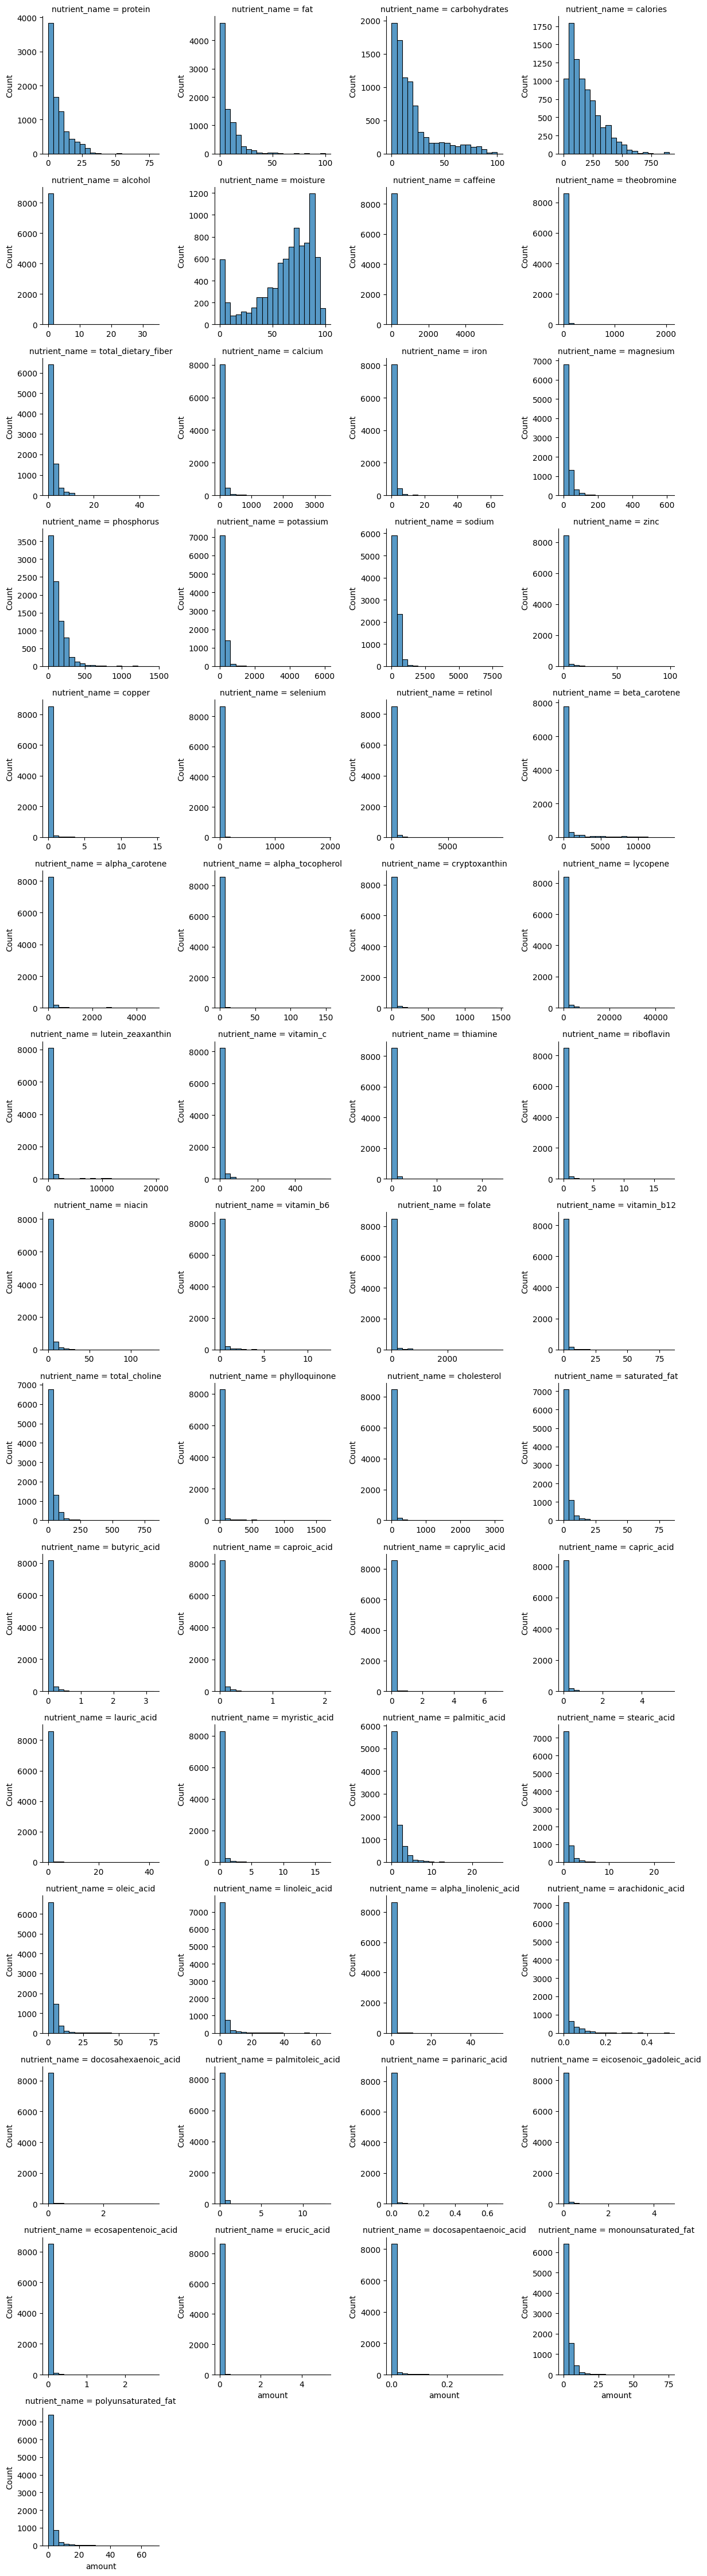

In [49]:
g = sns.FacetGrid(food_fndds, col="nutrient_name", col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, "amount", bins=20)


### Missing values

#### Missing nutrient names

It doesn't appear as though there are any missing `amount` values, but there certainly seem to be some missing `nutrient_name` measurements (12%):


In [50]:
food_fndds.apply(lambda x: x.isna().sum() / len(food_fndds.index))

fdc_id           0.000000
nutrient_id      0.000000
amount           0.000000
data_type        0.000000
description      0.000000
nutrient_name    0.123077
dtype: float64

Notice that there are no missing `nutrient_id` values however. The following table lists the nutrient IDs with no available `nutrient_name`. 


In [51]:
food_fndds[food_fndds["nutrient_name"].isna()]["nutrient_id"].unique()

array([2000, 1106, 1114, 1186, 1187, 1190, 1242, 1246])


These IDs simply *don't exist* in the original `nutrient_name` data file that helped us convert the `nutrient_id` to a `nutrient_name`.

All we can really do here is (since we are not in contact with the people who collected this data) is to drop these nutrient IDs (or create an "other" nutrient variable). 

> **Data cleaning action item: Remove nutrients whose name is missing**
> 
> Remove the 8 nutrient variables that don't have a corresponding `nutrient_name`.



Note that since this is akin to removing a *variable* rather than an *observation* it is not introducing bias into our data.


### Data format

Let's look at how the data is formatted 

In [52]:
food_fndds.head()

,fdc_id,nutrient_id,amount,data_type,description,nutrient_name
4161505,781082,1003,1.03,survey_fndds_food,"Milk, human",protein
4161506,781082,1004,4.38,survey_fndds_food,"Milk, human",fat
4161507,781082,1005,6.89,survey_fndds_food,"Milk, human",carbohydrates
4161508,781082,1008,70.00,survey_fndds_food,"Milk, human",calories
4161509,781082,1018,0.00,survey_fndds_food,"Milk, human",alcohol



Is this dataset in a "tidy" format? Recall that the definition of a tidy dataset is one where 


- Each *row* corresponds to the data for a *single observational unit* (if the data for a single observational unit is spread across multiple rows, most algorithms will treat these as different observational units). 

- Each column corresponds to a single type of measurement. 


This is not the case for the food dataset printed above. The observational units for this dataset are the individual food items, and since each different nutrient measurement lies on its own row, there are multiple rows in the data for each food item.

For instance, all of the rows below are for a single data unit: "Apple, raw".

In [28]:
food_fndds.query('description == "Apple, raw"')

,fdc_id,nutrient_id,amount,data_type,description,nutrient_name
4522190,786631,1003,0.260,survey_fndds_food,"Apple, raw",protein
4522191,786631,1004,0.170,survey_fndds_food,"Apple, raw",fat
4522192,786631,1005,13.810,survey_fndds_food,"Apple, raw",carbohydrates
4522193,786631,1008,52.000,survey_fndds_food,"Apple, raw",calories
4522194,786631,1018,0.000,survey_fndds_food,"Apple, raw",alcohol
...,...,...,...,...,...,...
4522250,786631,1278,0.000,survey_fndds_food,"Apple, raw",ecosapentenoic_acid
4522251,786631,1279,0.000,survey_fndds_food,"Apple, raw",erucic_acid
4522252,786631,1280,0.000,survey_fndds_food,"Apple, raw",docosapentaenoic_acid
4522253,786631,1292,0.007,survey_fndds_food,"Apple, raw",monounsaturated_fat


Moreover, the `amount` variable contains multiple types of measurements: it contains measurements for protein, for far, for calories, for vitamin C, etc. 

This data is clearly *not* in a "tidy" format. Instead, it is in a long format, which is typically (but not always) harder to work with.

> **Data cleaning action item: Pivot the data to a wider tidier format**
> 
> The data is in a long-format, so we need to pivot it into a wider format so that it is considered "tidy".


The tidy format for the food dataset will look like this:


In [ ]:
# group by at the level of description and nutrient_name
# then unstack the nutrient_name so we can set it as the column
food_fndds.groupby(["description", "nutrient_name"])["amount"] \
    .mean() \
    .to_frame() \
    .unstack(level="nutrient_name")["amount"]

nutrient_name,alcohol,alpha_carotene,alpha_linolenic_acid,alpha_tocopherol,arachidonic_acid,beta_carotene,butyric_acid,caffeine,calcium,calories,capric_acid,caproic_acid,caprylic_acid,carbohydrates,cholesterol,copper,cryptoxanthin,docosahexaenoic_acid,docosapentaenoic_acid,ecosapentenoic_acid,eicosenoic_gadoleic_acid,erucic_acid,fat,folate,iron,lauric_acid,linoleic_acid,lutein_zeaxanthin,lycopene,magnesium,moisture,monounsaturated_fat,myristic_acid,niacin,oleic_acid,palmitic_acid,palmitoleic_acid,parinaric_acid,phosphorus,phylloquinone,polyunsaturated_fat,potassium,protein,retinol,riboflavin,saturated_fat,selenium,sodium,stearic_acid,theobromine,thiamine,total_choline,total_dietary_fiber,vitamin_b12,vitamin_b6,vitamin_c,zinc
description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100 GRAND Bar,0.0,0.0,0.129,0.42,0.000,3.0,0.356,8.0,76.0,468.0,0.329,0.169,0.322,70.97,12.0,0.185,0.0,0.000,0.000,0.000,0.004,0.000,19.33,5.0,0.34,1.439,1.259,2.0,0.0,25.0,6.10,6.039,1.026,0.198,5.769,4.314,0.183,0.000,86.0,6.2,1.388,163.0,2.50,37.0,0.119,11.900,2.5,203.0,3.751,55.0,0.058,24.6,1.0,0.29,0.016,0.7,0.99
3 MUSKETEERS Bar,0.0,0.0,0.010,0.98,0.000,0.0,0.216,7.0,54.0,436.0,0.085,0.078,0.045,77.77,5.0,0.155,0.0,0.000,0.000,0.000,0.001,0.000,12.75,4.0,0.67,0.093,0.306,1.0,0.0,29.0,5.80,2.373,0.295,0.230,2.346,3.699,0.017,0.000,69.0,2.9,0.316,133.0,2.60,20.0,0.056,8.646,1.9,194.0,3.911,106.0,0.034,12.2,1.5,0.16,0.015,0.2,0.55
3 Musketeers Truffle Crisp Bar,0.0,0.0,0.100,0.60,0.000,0.0,0.287,16.0,150.0,538.0,0.365,0.095,0.287,63.15,18.0,0.391,0.0,0.000,0.000,0.000,0.000,0.000,28.85,9.0,1.88,2.520,0.991,5.0,0.0,50.0,0.18,5.536,1.651,0.306,5.205,6.984,0.331,0.000,165.0,5.8,1.091,296.0,6.41,46.0,0.239,19.230,3.6,63.0,6.959,163.0,0.089,36.6,0.0,0.60,0.028,0.0,1.83
"Abalone, cooked, NS as to cooking method",0.0,0.0,0.182,5.19,0.000,0.0,0.000,0.0,37.0,157.0,0.000,0.000,0.000,7.26,101.0,0.234,0.0,0.000,0.049,0.058,0.015,0.000,4.49,6.0,3.81,0.000,1.302,0.0,0.0,57.0,65.18,1.628,0.028,1.701,1.576,0.472,0.037,0.007,227.0,31.7,1.600,300.0,20.40,2.0,0.096,0.668,53.4,665.0,0.140,0.0,0.204,77.6,0.0,0.83,0.171,2.8,0.98
"Abalone, floured or breaded, fried",0.0,0.0,0.489,4.71,0.018,0.0,0.000,0.0,59.0,242.0,0.001,0.000,0.000,15.53,111.0,0.217,1.0,0.006,0.037,0.043,0.039,0.000,11.38,18.0,3.69,0.000,3.684,49.0,0.0,50.0,52.37,4.378,0.024,2.173,4.265,1.285,0.070,0.005,211.0,32.0,4.288,263.0,18.24,17.0,0.177,1.842,46.2,610.0,0.462,0.0,0.255,83.8,0.6,0.70,0.151,1.4,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombie,8.6,1.0,0.003,0.03,0.000,41.0,0.000,0.0,9.0,96.0,0.000,0.000,0.000,9.26,0.0,0.027,5.0,0.000,0.000,0.000,0.000,0.000,0.04,5.0,0.09,0.000,0.009,3.0,0.0,5.0,81.79,0.005,0.000,0.194,0.004,0.003,0.001,0.000,6.0,0.1,0.013,61.0,0.15,0.0,0.020,0.004,0.1,5.0,0.000,0.0,0.013,1.5,0.1,0.00,0.023,7.2,0.04
"Zucchini lasagna, diet frozen meal",0.0,194.0,0.039,0.39,0.004,680.0,0.056,0.0,113.0,99.0,0.071,0.047,0.029,12.76,9.0,0.074,0.0,0.000,0.001,0.001,0.005,0.000,3.19,29.0,0.69,0.082,0.211,331.0,1303.0,20.0,77.13,0.868,0.263,0.764,0.702,0.794,0.045,0.000,117.0,2.8,0.282,202.0,5.36,32.0,0.098,1.686,9.9,307.0,0.293,0.0,0.083,8.8,1.3,0.13,0.087,9.5,0.81
"Zucchini soup, cream of, prepared with milk",0.0,0.0,0.030,0.08,0.000,71.0,0.017,0.0,42.0,23.0,0.020,0.013,0.010,2.72,3.0,0.031,0.0,0.000,0.000,0.000,0.000,0.000,0.80,9.0,0.21,0.016,0.035,745.0,0.0,10.0,93.97,0.169,0.053,0.287,0.159,0.178,0.005,0.000,41.0,11.2,0.066,144.0,1.68,15.0,0.111,0.388,1.1,189.0,0.072,0.0,0.035,7.9,0.4,0.12,0.062,6.2,0.27


### Column names

The column names are actually fairly reasonably formatted (lower-case and underscore-separated). Although when we reformat the data into the tidy format (see previous section), the column names will become the nutrient names (which are also fairly reasonably formatted).





### Variable type

As far as we can tell, each column has a reasonable type. The ID columns could be converted to factors, but we will likely remove them in the cleaned version of the data because they are redundant when we have `description` and `nutrient_name`.

In [53]:
food_fndds.dtypes


fdc_id             int64
nutrient_id        int64
amount           float64
data_type         object
description       object
nutrient_name     object
dtype: object

> **Data cleaning action item: Remove ID variables**
> 
> The ID variables are redundant after joining the `description` and `nutrient_name` columns to the food data so they can be removed.


### Incomplete data

Finally, we arrive at the question of whether the data is "complete". What does it mean for this dataset to be complete? It means that every food item has a measurement for every nutrient variable. 

The code below shows that *every* food item has exactly 65 rows associated with it.

In [54]:
food_fndds["description"].value_counts().unique()

array([65])


Which indicates that our data is complete

### [project-specific] Exploring the `fat` hierarchy


Through our explorations above, we noticed that there are several `fat`-related variables that may have a hierarchical relationship. For instance, the data contains a variable simply called `fat`, but it also contains more specific fat-related variables such as `saturated_fat`, `monounsaturated_fat`, and `polyunsaturated fat`, and in addition also has even more specific fat-related variables, such as `oleic_acid`, `caproic_acid`, `palmitic_acid` and 16 other "fatty acid" variables. The scatter plot of `fat` against the sum of `saturated_fat`, `monounsaturated_fat`, and `polyunsaturated fat` shows that `fat` is *almost* exactly equal to the sum of `saturated_fat`, `monounsaturated_fat`, and `polyunsaturated fat`. 



In [56]:
fats = food_fndds[["description", "nutrient_name", "amount"]].query("nutrient_name == ['fat', 'saturated_fat', 'monounsaturated_fat', 'polyunsaturated_fat']") \
    .pivot(index="description", columns="nutrient_name", values="amount")
fats["fat_sum"] = fats.monounsaturated_fat + fats.polyunsaturated_fat + fats.saturated_fat
px.scatter(fats, x="fat", y="fat_sum")



If our analyses call for more detailed fat-related variables, it might make sense to consider removing the "higher-level" variables (such as `fat`, possibly as well as `saturated_fat`, `monounsaturated_fat` and `polyunsaturated_fat`). For now, we will choose not to remove `fat`, but this is a judgment call.


> **Data pre-processing judgment call: Keep higher-level fat variables**
> 
> Since it seems that `fat` is almost equal to the sum of `saturated_fat`, `monounsaturated_fat` and `polyunsaturated_fat`, it may make sense to remove `fat` from the data before conducting principal component analysis.



## Step 4: Clean the data

Now we implement the cleaning action items that we proposed in the sections above. Since the cleaning and pre-processing tasks are fairly separate (the pre-processing tasks will mostly involve variable transformations for principal component analysis), we will write separate `clean_food_data()` and `preprocess_food_data()` functions.



### The cleaning function

The cleaning function `clean_food_data()` that implements all of the action items we identified is shown below and is saved in the file "functions/clean_food_data.py".


In [57]:
from functions.clean_food_data import clean_food_data

# load the datasets to their appropriate dataframes
nutrient_amount = pd.read_csv("../data/food_nutrient.csv")
food_name = pd.read_csv("../data/food.csv")
nutrient_name = pd.read_csv("../data/nutrient_name.csv")

# create the clean dataset
food_fndds_clean = clean_food_data(nutrient_amount_data=nutrient_amount, 
                                   food_name_data=food_name, 
                                   nutrient_name_data=nutrient_name, 
                                   select_data_type="survey_fndds_food")
# look at the cleaned data object
food_fndds_clean

/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_67106/971637376.py:4: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



,alcohol,alpha_carotene,alpha_linolenic_acid,alpha_tocopherol,arachidonic_acid,beta_carotene,butyric_acid,caffeine,calcium,calories,capric_acid,caproic_acid,caprylic_acid,carbohydrates,cholesterol,copper,cryptoxanthin,docosahexaenoic_acid,docosapentaenoic_acid,ecosapentenoic_acid,eicosenoic_gadoleic_acid,erucic_acid,fat,folate,iron,lauric_acid,linoleic_acid,lutein_zeaxanthin,lycopene,magnesium,moisture,monounsaturated_fat,myristic_acid,niacin,oleic_acid,palmitic_acid,palmitoleic_acid,parinaric_acid,phosphorus,phylloquinone,polyunsaturated_fat,potassium,protein,retinol,riboflavin,saturated_fat,selenium,sodium,stearic_acid,theobromine,thiamine,total_choline,total_dietary_fiber,vitamin_b12,vitamin_b6,vitamin_c,zinc
description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Milk, human",0.0,0.0,0.052,0.08,0.026,7.0,0.000,0.0,32.0,70.0,0.063,0.000,0.000,6.89,14.0,0.052,0.0,0.000,0.0,0.000,0.040,0.000,4.38,5.0,0.03,0.256,0.374,0.0,0.0,3.0,87.50,1.658,0.321,0.177,1.475,0.919,0.129,0.0,14.0,0.3,0.497,51.0,1.03,60.0,0.036,2.009,1.8,17.0,0.293,0.0,0.014,16.0,0.0,0.05,0.011,5.0,0.17
"Milk, NFS",0.0,0.0,0.030,0.04,0.000,4.0,0.059,0.0,119.0,51.0,0.049,0.044,0.036,4.85,8.0,0.014,0.0,0.000,0.0,0.000,0.001,0.000,2.04,5.0,0.03,0.052,0.070,0.0,0.0,11.0,89.13,0.541,0.185,0.091,0.517,0.548,0.013,0.0,91.0,0.2,0.102,141.0,3.27,53.0,0.179,1.232,3.1,45.0,0.240,0.0,0.039,15.8,0.0,0.49,0.037,0.1,0.42
"Milk, whole",0.0,0.0,0.075,0.07,0.000,7.0,0.075,0.0,113.0,61.0,0.075,0.075,0.075,4.80,10.0,0.025,0.0,0.000,0.0,0.000,0.000,0.000,3.25,5.0,0.03,0.077,0.120,0.0,0.0,10.0,88.13,0.812,0.297,0.089,0.812,0.829,0.000,0.0,84.0,0.3,0.195,132.0,3.15,45.0,0.169,1.865,3.7,43.0,0.365,0.0,0.046,14.3,0.0,0.45,0.036,0.0,0.37
"Milk, low sodium, whole",0.0,0.0,0.050,0.08,0.000,7.0,0.112,0.0,101.0,61.0,0.087,0.066,0.039,4.46,14.0,0.010,0.0,0.000,0.0,0.000,0.000,0.000,3.46,5.0,0.05,0.097,0.078,0.0,0.0,5.0,88.20,0.999,0.348,0.043,0.870,0.910,0.077,0.0,86.0,0.3,0.128,253.0,3.10,28.0,0.105,2.154,2.0,3.0,0.419,0.0,0.020,16.0,0.0,0.36,0.034,0.9,0.38
"Milk, calcium fortified, whole",0.0,0.0,0.075,0.07,0.000,7.0,0.075,0.0,113.0,61.0,0.075,0.075,0.075,4.80,10.0,0.025,0.0,0.000,0.0,0.000,0.000,0.000,3.25,5.0,0.03,0.077,0.120,0.0,0.0,10.0,88.13,0.812,0.297,0.089,0.812,0.829,0.000,0.0,84.0,0.3,0.195,132.0,3.15,45.0,0.169,1.865,3.7,43.0,0.365,0.0,0.046,14.3,0.0,0.45,0.036,0.0,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Breading or batter as ingredient in food,0.0,0.0,0.028,0.09,0.010,0.0,0.000,0.0,47.0,201.0,0.000,0.000,0.000,39.64,19.0,0.093,0.0,0.003,0.0,0.000,0.001,0.000,1.39,91.0,2.57,0.000,0.415,34.0,0.0,14.0,51.53,0.318,0.002,3.153,0.305,0.240,0.011,0.0,79.0,0.7,0.459,71.0,6.32,8.0,0.274,0.336,18.6,246.0,0.092,0.0,0.428,21.2,1.6,0.08,0.039,0.0,0.50
Wheat bread as ingredient in sandwiches,0.0,0.0,0.149,0.35,0.002,2.0,0.000,0.0,161.0,263.0,0.003,0.000,0.001,45.29,0.0,0.191,0.0,0.000,0.0,0.002,0.014,0.000,3.96,72.0,3.12,0.008,1.405,64.0,0.0,56.0,37.06,0.654,0.007,4.886,0.620,0.437,0.017,0.0,166.0,5.5,1.560,190.0,11.45,0.0,0.214,0.716,27.6,464.0,0.236,0.0,0.398,21.3,5.4,0.00,0.159,0.1,1.36
Sauce as ingredient in hamburgers,0.0,0.0,1.675,1.90,0.015,196.0,0.000,0.0,18.0,271.0,0.000,0.000,0.000,17.19,13.0,0.064,4.0,0.002,0.0,0.000,0.100,0.112,22.85,8.0,0.43,0.000,11.804,112.0,7237.0,13.0,55.97,5.280,0.017,0.917,5.023,2.390,0.028,0.0,33.0,50.8,13.509,190.0,1.29,4.0,0.112,3.541,4.5,845.0,0.936,0.0,0.027,20.0,0.6,0.04,0.104,2.5,0.21



We can also load one of the other datasets by specifying alternative `.select_data_type` options. For example, we can load the SR Legacy data using: 


In [58]:
food_legacy_clean = clean_food_data(nutrient_amount_data=nutrient_amount, 
                                   food_name_data=food_name, 
                                   nutrient_name_data=nutrient_name, 
                                   select_data_type="sr_legacy_food")
food_legacy_clean

,18_1_11t,alanine,alcohol,alpha_carotene,alpha_linolenic_acid,alpha_tocopherol,alpha_tocotrienol,arachidic_acid,arachidonic_acid,arginine,ash,aspartic_acid,behenic_acid,beta_carotene,beta_sitoserol,beta_tocopherol,beta_tocotrienol,betaine,butyric_acid,caffeine,calcium,calories,campesterol,capric_acid,caproic_acid,caprylic_acid,carbohydrates,cholesterol,conjugated_linoleic_acid,copper,cryptoxanthin,cystine,delta_tocopherol,delta_tocotrienol,dihydrophylloquinone,docosaenoic,docosahexaenoic_acid,docosapentaenoic_acid,docosatetraenoic,ecosapentenoic_acid,eicosadienoic,eicosatetraenoic_omega6,eicosatrienoic_acid,eicosatrienoic_omega3,eicosatrienoic_omega6,eicosenoic_gadoleic_acid,elaidic,erucic_acid,fat,folate,fructose,galactose,gamma_linolenic,gamma_tocopherol,glucose,glutamic_acid,glycine,heneicosapentaenoic,heptadecanoic_margaric_acid,heptadecenoic_acid,hexadecenoic_palmitoleic,histidine,hydroxyproline,iron,isoleucine,lactose,lauric_acid,leucine,linoelaidic,linoleic_acid,lutein_zeaxanthin,lycopene,lysine,magnesium,maltose,manganese,menaquinone_4,methionine,moisture,monounsaturated_fat,myristic_acid,myristoleic_acid,niacin,octadecadienoic_linoleic,octadecatrienoic_linolenic,oleic,oleic_acid,palmitic_acid,palmitoleic_acid,panthothenic_acid,parinaric_acid,pentadecanoic_acid,pentadecenoic_acid,phenylalanine,phosphorus,phylloquinone,polyunsaturated_fat,potassium,proline,protein,retinol,riboflavin,saturated_fat,selenium,serine,sodium,starch,stearic_acid,stigmaterol,sucrose,tetracosaenoic_nervonic,tetracosanoic_lignoceric_acid,theobromine,thiamine,threonine,total_18_3_trans,total_choline,total_dietary_fiber,trans_docosaenoic,trans_fat,trans_hexadecenoic,trans_octadecadienoic,tridecanoic_acid,tryptophane,tyrosine,valine,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_d2,vitamin_d3,zinc
description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Pork, fresh, composite of trimmed leg, loin, shoulder, and spareribs, (includes cuts to be cured), separable lean and fat, raw",NaN,1.073,0.0,0.0,0.091,0.12,0.00,0.006,0.116,1.190,0.88,1.723,0.0,0.0,NaN,0.0,0.000,1.7,0.0,0.0,11.0,211.0,NaN,0.007,0.0,0.0,0.00,69.0,NaN,0.075,0.0,0.218,0.0,0.0,0.0,NaN,0.000,0.000,NaN,0.0,0.023,NaN,0.002,NaN,NaN,0.102,0.036,0.0,14.79,3.0,NaN,NaN,0.001,0.00,NaN,2.841,0.915,NaN,0.015,0.0,NaN,0.742,0.024,0.89,0.863,NaN,0.011,1.498,0.02,1.506,0.0,0.0,1.657,21.0,NaN,0.014,NaN,0.485,65.99,6.102,0.179,0.000,4.730,0.701,0.026,2.188,5.820,3.141,0.377,0.899,0.0,0.001,0.0,0.744,195.0,0.0,1.726,319.0,0.774,18.22,1.0,0.255,4.918,28.5,0.771,57.0,NaN,1.693,NaN,NaN,NaN,NaN,0.0,0.622,0.816,NaN,34.7,0.0,NaN,0.034,NaN,NaN,NaN,0.205,0.654,0.963,6.0,0.67,0.504,0.3,29.0,NaN,0.7,2.27
"Pork, fresh, backfat, raw",NaN,0.170,0.0,0.0,0.740,0.00,NaN,NaN,0.110,0.182,0.70,0.271,NaN,0.0,NaN,NaN,NaN,0.6,0.0,0.0,2.0,812.0,NaN,0.060,0.0,0.0,0.00,57.0,NaN,0.018,0.0,0.037,NaN,NaN,0.0,NaN,0.000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.720,NaN,0.0,88.69,1.0,NaN,NaN,NaN,NaN,NaN,0.457,0.139,NaN,NaN,NaN,NaN,0.117,NaN,0.18,0.137,NaN,0.190,0.234,NaN,9.500,0.0,0.0,0.263,2.0,NaN,0.002,NaN,0.077,7.69,41.950,1.120,NaN,0.985,NaN,NaN,NaN,38.480,19.450,2.750,0.115,0.0,NaN,NaN,0.117,38.0,0.0,10.350,65.0,0.117,2.92,5.0,0.051,32.210,8.0,0.121,11.0,NaN,11.390,NaN,NaN,NaN,NaN,0.0,0.084,0.133,NaN,15.4,0.0,NaN,NaN,NaN,NaN,NaN,0.037,0.102,0.158,15.0,0.18,0.040,0.1,122.0,NaN,3.1,0.37
"Pork, fresh, belly, raw",NaN,NaN,0.0,0.0,0.480,0.39,0.02,NaN,0.140,NaN,0.49,NaN,NaN,0.0,NaN,0.0,0.000,NaN,0.0,0.0,5.0,518.0,NaN,0.040,0.0,0.0,0.00,72.0,NaN,0.052,0.0,NaN,0.0,0.0,0.0,NaN,0.000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.430,NaN,0.0,53.01,1.0,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.52,NaN,NaN,0.060,NaN,NaN,5.030,0.0,0.0,NaN,4.0,NaN,0.006,NaN,NaN,36.74,24.700,0.700,NaN,4.647,NaN,NaN,NaN,22.770,11.920,1.500,0.256,0.0,NaN,NaN,NaN,108.0,0.0,5.650,185.0,NaN,9.34,3.0,0.242,19.330,8.0,NaN,32.0,NaN,6.490,NaN,NaN,NaN,NaN,0.0,0.396,NaN,NaN,


## Pre-processing

Two very common pre-processing steps in PCA analysis is to standardize (mean-center and SD-scale) the variables, and whether to *log-transform* the (non-negative) variables in order to make their distributions more Normal (since PCA, in theory, is more "effective" on Gaussian data). Neither of these steps are strictly *necessary* (although the *interpretation* of the principal components will change if you don't standardize the variables - see book for details). 

So that we can easily explore the impacts of these pre-processing steps in our PCS analyses, we will write a re-usable pre-processing function. Note that there is an option (which is defaulted to TRUE) to remove the moisture, alcohol, caffeine, and theobromine nutrients, since we decided that these did not fit into our idea of the kinds of nutrient types we want to summarize.

Note that we certainly could have included these pre-processing steps in the data cleaning function (and just had one `prepare_food_data()` function), but we found it easier to have two separate functions for this particular project.

In [59]:
from functions.preprocess_food_data import preprocess_food_data

food_fndds_preprocessed = preprocess_food_data(food_clean=food_fndds_clean)
food_fndds_preprocessed


,alcohol,alpha_carotene,alpha_linolenic_acid,alpha_tocopherol,arachidonic_acid,beta_carotene,butyric_acid,caffeine,calcium,calories,capric_acid,caproic_acid,caprylic_acid,carbohydrates,cholesterol,copper,cryptoxanthin,docosahexaenoic_acid,docosapentaenoic_acid,ecosapentenoic_acid,eicosenoic_gadoleic_acid,erucic_acid,fat,folate,iron,lauric_acid,linoleic_acid,lutein_zeaxanthin,lycopene,magnesium,moisture,monounsaturated_fat,myristic_acid,niacin,oleic_acid,palmitic_acid,palmitoleic_acid,parinaric_acid,phosphorus,phylloquinone,polyunsaturated_fat,potassium,protein,retinol,riboflavin,saturated_fat,selenium,sodium,stearic_acid,theobromine,thiamine,total_choline,total_dietary_fiber,vitamin_b12,vitamin_b6,vitamin_c,zinc
description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Milk, human",-0.105538,-0.512603,-0.454494,-0.959380,0.325721,-0.331906,-0.379796,-0.222007,-0.053246,-0.658973,0.191839,-0.373270,-0.298288,-0.400280,0.429822,-0.406852,-0.526784,-0.208179,-0.234663,-0.183250,0.117856,-0.114834,-0.030645,-0.910929,-1.306860,0.689264,-0.611365,-1.173439,-0.383716,-1.817769,0.616051,-0.048165,0.549733,-1.095422,-0.088383,-0.030220,0.183177,-0.131899,-1.387429,-1.090082,-0.580196,-1.212419,-1.167078,1.069239,-0.678441,0.213020,-0.671407,-1.517320,-0.306956,-0.215463,-0.689686,-0.095874,-1.286727,-0.512260,-0.749904,0.500607,-0.889898
"Milk, NFS",-0.105538,-0.512603,-0.561568,-1.038391,-0.462967,-0.514901,0.240612,-0.222007,1.003708,-0.997017,0.061867,0.314832,0.100920,-0.666515,0.147550,-0.655766,-0.526784,-0.208179,-0.234663,-0.183250,-0.379538,-0.114834,-0.600317,-0.910929,-1.306860,-0.084864,-0.996860,-1.173439,-0.383716,-0.544017,0.636436,-0.746814,0.101457,-1.204897,-0.730127,-0.417782,-0.536786,-0.131899,0.188072,-1.147895,-1.038575,-0.135338,-0.348640,1.005744,0.107729,-0.196249,-0.354328,-0.899908,-0.411980,-0.215463,-0.545122,-0.106604,-1.286727,0.232116,-0.615956,-0.904508,-0.497139
"Milk, whole",-0.105538,-0.512603,-0.344922,-0.978855,-0.462967,-0.331906,0.402903,-0.222007,0.961713,-0.806099,0.301888,0.782433,0.518034,-0.674155,0.258437,-0.582766,-0.526784,-0.208179,-0.234663,-0.183250,-0.392545,-0.114834,-0.265936,-0.910929,-1.306860,0.017717,-0.926457,-1.173439,-0.383716,-0.644900,0.623974,-0.539196,0.474082,-1.207544,-0.497166,-0.116873,-0.622559,-0.131899,0.119330,-1.090082,-0.917343,-0.205541,-0.380015,0.922219,0.055938,0.145830,-0.240775,-0.929158,-0.170979,-0.215463,-0.505267,-0.191403,-1.286727,0.174239,-0.621045,-0.983451,-0.569841
"Milk, low sodium, whole",-0.105538,-0.512603,-0.464135,-0.959380,-0.462967,-0.331906,0.769135,-0.222007,0.870651,-0.806099,0.410715,0.648082,0.133559,-0.727916,0.429822,-0.682509,-0.526784,-0.208179,-0.234663,-0.183250,-0.392545,-0.114834,-0.217804,-0.910929,-1.271969,0.098082,-0.985378,-1.173439,-0.383716,-1.347665,0.624851,-0.413324,0.633215,-1.269815,-0.455860,-0.038700,-0.129953,-0.131899,0.139532,-1.090082,-1.003681,0.488134,-0.393357,0.681894,-0.286399,0.277503,-0.614045,-2.507052,-0.073623,-0.215463,-0.654668,-0.095874,-1.286727,0.037951,-0.631239,-0.451823,-0.555090
"Milk, calcium fortified, whole",-0.105538,-0.512603,-0.344922,-0.978855,-0.462967,-0.331906,0.402903,-0.222007,0.961713,-0.806099,0.301888,0.782433,0.518034,-0.674155,0.258437,-0.582766,-0.526784,-0.208179,-0.234663,-0.183250,-0.392545,-0.114834,-0.265936,-0.910929,-1.306860,0.017717,-0.926457,-1.173439,-0.383716,-0.644900,0.623974,-0.539196,0.474082,-1.207544,-0.497166,-0.116873,-0.622559,-0.131899,0.119330,-1.090082,-0.917343,-0.205541,-0.380015,0.922219,0.055938,0.145830,-0.240775,-0.929158,-0.170979,-0.215463,-0.505267,-0.191403,-1.286727,0.174239,-0.621045,-0.983451,-0.569841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Breading or batter as ingredient in food,-0.105538,-0.512603,-0.571415,-0.940085,-0.157225,-1


This can also be applied to the external validation data.

In [60]:
food_legacy_preprocessed = preprocess_food_data(food_clean=food_legacy_clean)
food_legacy_preprocessed


,18_1_11t,alanine,alcohol,alpha_carotene,alpha_linolenic_acid,alpha_tocopherol,alpha_tocotrienol,arachidic_acid,arachidonic_acid,arginine,ash,aspartic_acid,behenic_acid,beta_carotene,beta_sitoserol,beta_tocopherol,beta_tocotrienol,betaine,butyric_acid,caffeine,calcium,calories,campesterol,capric_acid,caproic_acid,caprylic_acid,carbohydrates,cholesterol,conjugated_linoleic_acid,copper,cryptoxanthin,cystine,delta_tocopherol,delta_tocotrienol,dihydrophylloquinone,docosaenoic,docosahexaenoic_acid,docosapentaenoic_acid,docosatetraenoic,ecosapentenoic_acid,eicosadienoic,eicosatetraenoic_omega6,eicosatrienoic_acid,eicosatrienoic_omega3,eicosatrienoic_omega6,eicosenoic_gadoleic_acid,elaidic,erucic_acid,fat,folate,fructose,galactose,gamma_linolenic,gamma_tocopherol,glucose,glutamic_acid,glycine,heneicosapentaenoic,heptadecanoic_margaric_acid,heptadecenoic_acid,hexadecenoic_palmitoleic,histidine,hydroxyproline,iron,isoleucine,lactose,lauric_acid,leucine,linoelaidic,linoleic_acid,lutein_zeaxanthin,lycopene,lysine,magnesium,maltose,manganese,menaquinone_4,methionine,moisture,monounsaturated_fat,myristic_acid,myristoleic_acid,niacin,octadecadienoic_linoleic,octadecatrienoic_linolenic,oleic,oleic_acid,palmitic_acid,palmitoleic_acid,panthothenic_acid,parinaric_acid,pentadecanoic_acid,pentadecenoic_acid,phenylalanine,phosphorus,phylloquinone,polyunsaturated_fat,potassium,proline,protein,retinol,riboflavin,saturated_fat,selenium,serine,sodium,starch,stearic_acid,stigmaterol,sucrose,tetracosaenoic_nervonic,tetracosanoic_lignoceric_acid,theobromine,thiamine,threonine,total_18_3_trans,total_choline,total_dietary_fiber,trans_docosaenoic,trans_fat,trans_hexadecenoic,trans_octadecadienoic,tridecanoic_acid,tryptophane,tyrosine,valine,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_d2,vitamin_d3,zinc
description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Pork, fresh, composite of trimmed leg, loin, shoulder, and spareribs, (includes cuts to be cured), separable lean and fat, raw",9.516197e-17,5.026499e-01,-0.112586,-0.328461,-0.165285,-0.600336,-3.523360e-01,-3.272475e-01,1.347230,4.649376e-01,-0.465765,5.209209e-01,-3.082885e-01,-0.685620,-5.148860e-17,-3.419895e-01,-3.793795e-01,-0.769098,-0.223491,-0.208099,-0.554490,0.320273,2.074577e-16,-0.231467,-0.242896,-0.206477,-1.235933,0.995089,3.759485e-17,-0.329703,-0.341256,3.057028e-01,-4.468863e-01,-1.575363e-01,-3.065131e-01,-5.493887e-17,-0.175082,-0.161007,-3.988079e-17,-0.146237,3.434479e-01,-3.229740e-17,-3.958123e-01,2.402802e-17,5.639228e-17,0.433038,-5.169255e-01,-0.104947,0.834413,-0.821294,-1.954502e-16,-3.374965e-17,-2.511961e-01,-6.337059e-01,-3.266863e-17,4.055165e-01,4.059132e-01,0.0,-4.845574e-01,-5.805021e-01,-3.084845e-17,8.132966e-01,-1.120453e+00,-0.399643,5.016532e-01,1.452628e-17,-0.215889,5.115233e-01,-9.521644e-02,0.394871,-0.686492,-0.248618,6.521602e-01,0.053383,3.322234e-17,-0.543153,-2.345026e-17,4.752135e-01,0.459411,0.869945,-0.032210,-5.155592e-01,0.721499,-2.979370e-01,-4.242273e-01,-2.482701e-01,0.893077,0.918624,0.658503,0.683222,-0.0931,-0.505246,-0.145847,3.811793e-01,0.538020,-0.948671,0.379598,0.470714,1.498501e-01,0.797666,-0.337495,0.224233,0.796409,0.981880,4.194412e-01,-0.169013,9.741803e-17,0.892264,-2.593222e-17,9.840176e-17,1.543540e-17,5.404576e-17,-0.206235,1.723806,5.296393e-01,0.00000,3.246056e-01,-0.817723,2.023185e-17,-3.527500e-01,4.543838e-17,7.596263e-17,2.363973e-17,3.753230e-01,4.739487e-01,5.158421e-01,-0.488176,0.019477,0.946747,-0.467644,1.446962e+00,-2.574430e-17,3.043602e-01,0.470144
"Pork, fresh, backfat, raw",9.516197e-17,-1.067411e+00,-0.112586,-0.328461,1.774850,-0.787380,-5.342427e-17,1.247004e-17,1.254343,-1.084074e+00,-0.677030,-1.135173e+00,1.840784e-17,-0.685620,-5.148860e-17,7.518971e-18,9.608421e-18,-1.230930,-0.223491,-0.208099,-1.552851,1.664832,2.074577e-16,0.132234,-0.242896,-0.206477,-1.235933,0.904630,3.759485e-17,-0.57725